In [14]:
# This is a note book to check the if the cleaned preprocess pipeline is consistent with the development one

In [15]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [16]:
origin_dir = '/raid/COVID-19/CT-severity/processed/dataset/medseg_1/'
new_dir = '/raid/COVID-19/lung_seg_em/output/medseg/'

In [72]:
origin_ct = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(origin_dir, 'ct_origin', '1.nii')))
new_ct = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(new_dir, 'ct_origin', '1.nii.gz')))

((45, 512, 512), (45, 512, 512))


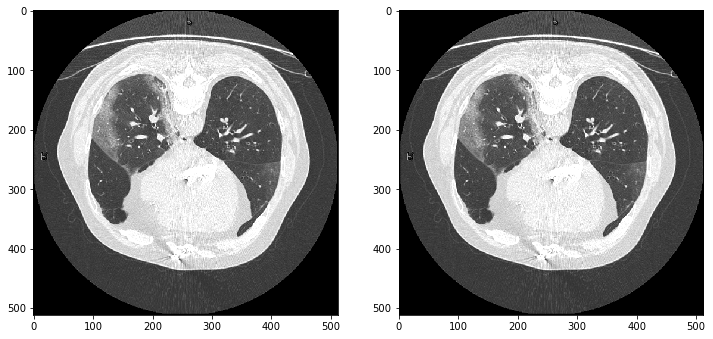

In [73]:
print (origin_ct.shape, new_ct.shape)
plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(origin_ct[origin_ct.shape[0] // 3 , ...], 'gray', vmin=-1350, vmax=150)
plt.subplot(122); plt.imshow(new_ct[new_ct.shape[0] // 3 , ...], 'gray', vmin=-1350, vmax=150)

In [50]:
origin_mask = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(origin_dir, 'ct_lung_mask', '1.nii')))
new_mask = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(new_dir, 'lung_mask', '1.nii.gz')))

((45, 512, 512), (45, 512, 512))


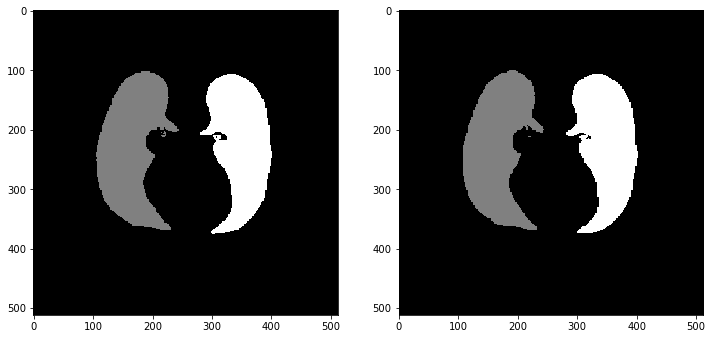

In [51]:
print (origin_mask.shape, new_mask.shape)
plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(origin_mask[origin_mask.shape[0] // 2, ...], 'gray')
plt.subplot(122); plt.imshow(new_mask[new_mask.shape[0] // 2, ...], 'gray')

In [17]:
origin_npy = np.load(os.path.join(origin_dir, 'npzs/unet2', '0.npy'))
new_npy = np.load(os.path.join(new_dir, 'npzs/unet2', '0.npy'))

((407, 256, 256, 1), (407, 256, 256, 1))


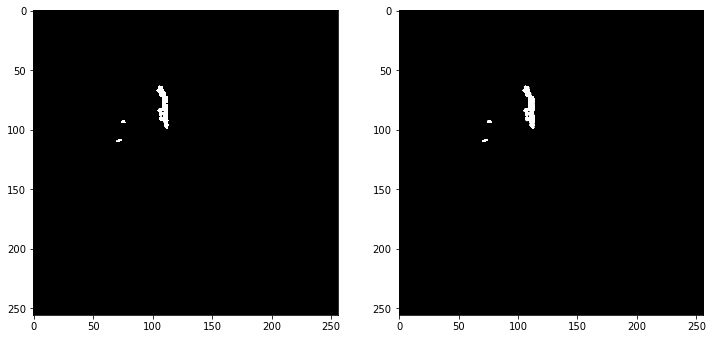

In [129]:
print (origin_npy.shape, new_npy.shape)
islice = 10
plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(origin_npy[islice,...,0], 'gray')
plt.subplot(122); plt.imshow(new_npy[islice,...,0], 'gray')

In [20]:
new_npz = np.load(os.path.join(new_dir, 'npzs', '0.npz'))

In [23]:
print (new_npz['label'].shape)

(407, 256, 256, 1)


In [25]:
np.where(np.sum(new_npz['label'], (1,2,3)) == 0)

(array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 140, 141, 149, 150,
        151, 152, 153, 154, 155, 194, 195, 196, 197, 198, 199, 200, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        240, 241, 242, 243, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
        275, 276, 277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288,
        289, 290, 291, 292, 366, 367, 368, 369, 370, 371, 372, 373]),)